In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
class Node:
    def __init__(self, position, parent=None):
        self.position = position
        self.parent = parent

def distance(a, b):
    return np.linalg.norm(np.array(a) - np.array(b))

def get_random_point(bounds):
    return [random.uniform(bounds[0][0], bounds[0][1]), random.uniform(bounds[1][0], bounds[1][1])]

def nearest_node(nodes, random_point):
    return min(nodes, key=lambda node: distance(node.position, random_point))

def steer(from_node, to_point, step_size):
    direction = np.array(to_point) - np.array(from_node.position)
    length = np.linalg.norm(direction)
    if length > step_size:
        direction = direction / length * step_size
    new_position = from_node.position + direction
    return Node(new_position, from_node)

def is_collision(node, obstacles):
    for (ox, oy, size) in obstacles:
        if distance(node.position, (ox, oy)) <= size:
            return True
    return False

def rrt(start, goal, bounds, obstacles, max_iterations=1000, step_size=0.5):
    nodes = [Node(start)]
    for _ in range(max_iterations):
        random_point = get_random_point(bounds)
        nearest = nearest_node(nodes, random_point)
        new_node = steer(nearest, random_point, step_size)

        if not is_collision(new_node, obstacles):
            nodes.append(new_node)
            if distance(new_node.position, goal) < step_size:
                goal_node = Node(goal, new_node)
                nodes.append(goal_node)
                return nodes
    return None

def extract_path(nodes):
    path = []
    node = nodes[-1]
    while node is not None:
        path.append(node.position)
        node = node.parent
    return path[::-1]

def plot_rrt(nodes, path, obstacles):
    plt.figure()
    for node in nodes:
        if node.parent is not None:
            plt.plot([node.position[0], node.parent.position[0]],
                     [node.position[1], node.parent.position[1]], 'g-')
    if path is not None:
        plt.plot(*zip(*path), 'r-', linewidth=2)
    for (ox, oy, size) in obstacles:
        circle = plt.Circle((ox, oy), size, color='black')
        plt.gca().add_artist(circle)
    plt.xlim(-1, 10)
    plt.ylim(-1, 10)
    plt.grid()
    plt.title("RRT Path Planning")
    plt.show()

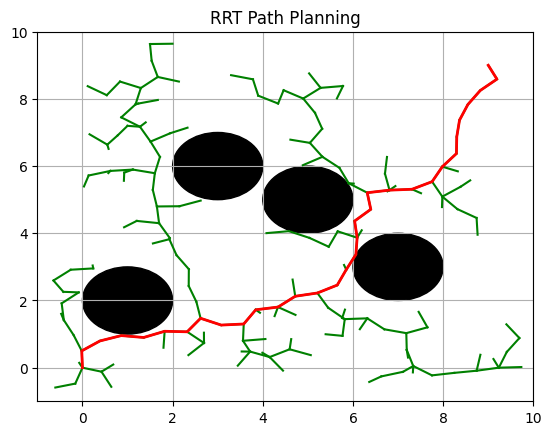

In [ ]:
start = [0, 0]
goal = [9, 9]
bounds = [[-1, 10], [-1, 10]]
obstacles = [(5, 5, 1), (3, 6, 1), (7, 3, 1),(1,2,1)]
nodes = rrt(start, goal, bounds, obstacles)
if nodes is not None:
    path = extract_path(nodes)
    plot_rrt(nodes, path, obstacles)
else:
    print("No path found.")